In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

def fit_line(x_fit, y_fit):
    x_array = np.array(x_fit)
    y_array = np.array(y_fit)
    a, b = np.polyfit(x_array, y_array, 1)
    return a, b, x_array

In [3]:
# files = os.listdir("C:\Users\mearo\Documents\MD_sim_project\plots\midterm\msds\\")
files2 = os.listdir("msds_15/")

# msd = pd.DataFrame(np.loadtxt("plots\midterm\msds" + "\\" + files[0]))
# msd_15 = pd.DataFrame(np.loadtxt("plots\midterm\msds" + "\\" + files2[0]))

coeffs2 = []

for i in files2:
    msd_15 = pd.DataFrame(np.loadtxt("msds_15/" + i))
    # print(msd)

    msd_15_sliced_x = msd_15[0][18:]
    msd_15_sliced_y = msd_15[1][18:]

    a_fit, b_fit, x_fit = fit_line(msd_15_sliced_x, msd_15_sliced_y) # fit the line
    # plt.plot(x_fit, a_fit*x_fit+b_fit, color = 'tab:red', linewidth=0.5) # plot the fitted line

    coeffs2.append(a_fit)

coeffs2


[0.0008305879383505998,
 0.006223917792144216,
 0.017379508956173073,
 0.03247308754843207,
 0.05035588298651058,
 0.08039064710727352,
 0.11499431017075777,
 0.1521771675090935,
 0.19573893710903909,
 0.23338444940969227,
 0.27288181854653315,
 0.31475986995355726,
 0.3615212031691992,
 0.40232579261180573,
 0.4492407761184517,
 0.4882686630162569,
 0.5387602259040187]

In [4]:
d12 = pd.read_csv("d1.2_LJ822_results.csv", usecols=["1/temp", "diff_coef"])

temps = [0.652, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.3, 2.6, 2.9, 3.5, 3.8, 4.1, 4.4, 4.7, 5.0, 5.3, 5.6]
temps2 = [1.2, 1.4, 1.6, 1.8, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5.0, 5.3, 5.6]

coeffs = [0.000116276385348556, 0.0005500690869230285, 0.0035435595919929754, 0.009863532561012356, 0.018435604069493967, 0.0416489567795758, 0.06960098559431252, 0.09892791579859819, 0.13359736306353928, 0.16530926094762938, 0.22237126539865396, 0.2771507286621655, 0.3375643206722525, 0.44994573248579717, 0.5136409036178601, 0.5732560518869623, 0.632326424327286, 0.6935870928196025, 0.7529212900531842, 0.8169786793154346, 0.8749722237802947]
coeffs2 = [0.0008305879383505998, 0.006223917792144216, 0.017379508956173073, 0.03247308754843207, 0.05035588298651058, 0.08039064710727352, 0.11499431017075777, 0.1521771675090935, 0.19573893710903909, 0.23338444940969227, 0.27288181854653315, 0.31475986995355726, 0.3615212031691992, 0.40232579261180573, 0.4492407761184517, 0.4882686630162569, 0.5387602259040187]

In [5]:
temps = pd.Series(temps)
invT = 1/temps

temps2 = pd.Series(temps2)
invT2 = 1/temps2

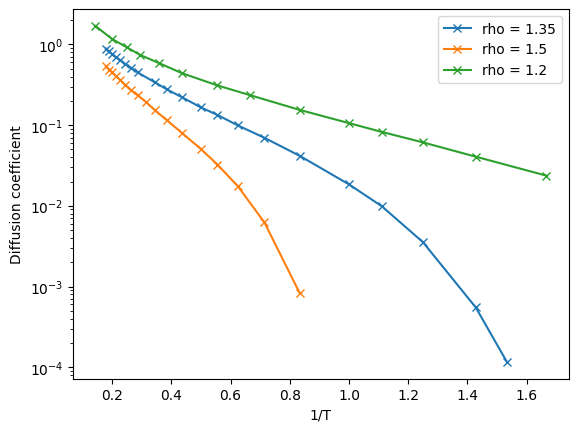

In [6]:

plt.xlabel("1/T")
plt.ylabel("Diffusion coefficient")
plt.yscale('log')
plt.plot(invT, coeffs, marker = 'x', label = 'rho = 1.35')
plt.plot(invT2, coeffs2, marker = 'x', label = 'rho = 1.5')
plt.plot(d12['1/temp'], d12['diff_coef'], marker = 'x', label = 'rho = 1.2')
plt.legend()
plt.savefig("intomidterm.png")